In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl
from sklearn.cluster import KMeans
from fase2_funciones import *

In [22]:
df_bd_preprocesada = pd.read_csv('BD/OnlineRetail_Preprocesada.csv', sep=',', encoding = 'unicode_escape')
df_pivot = df_bd_preprocesada['InvoiceDate'].str.split(expand = True)
df_pivot.rename(columns = {0: 'Fecha', 1: 'Hora'}, inplace=True)
df_bd_preprocesada = df_bd_preprocesada.drop(columns =['Unnamed: 0','InvoiceDate'])
df_bd_preprocesada = pd.concat([df_bd_preprocesada,df_pivot], axis = 1)
df_bd_preprocesada['Monto'] = df_bd_preprocesada['UnitPrice'] * df_bd_preprocesada['Quantity']


In [23]:
df_bd_aux=df_bd_preprocesada.drop(['StockCode','Description','Country','Fecha','Hora'],axis=1)
df_bd_Normalizada = (df_bd_aux-df_bd_aux.min())/(df_bd_aux.max()-df_bd_aux.min())
df_bd_Normalizada.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,Monto
count,392732.000000,392732.000000,392732.000000,392732.000000,392732.000000
mean,0.535714,0.000150,0.000384,0.495158,0.000134
std,0.289397,0.002242,0.002731,0.288431,0.001847
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.284574,0.000012,0.000154,0.270830,0.000029
50%,0.564084,0.000062,0.000239,0.471974,0.000074
75%,0.789350,0.000136,0.000461,0.748191,0.000118
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
wcss = []

for i in range (1,11):
    kmeans = KMeans(n_clusters = i, max_iter=300)
    kmeans.fit(df_bd_Normalizada)
    wcss.append(kmeans.inertia_)

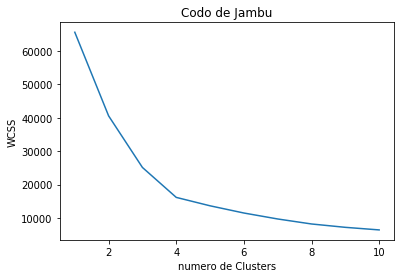

In [25]:
plt.plot(range(1,11),wcss)
plt.title("Codo de Jambu")
plt.xlabel("numero de Clusters")
plt.ylabel("WCSS")
plt.show()

In [27]:
from sklearn.decomposition import PCA #analisis de componentes principales
pca = PCA(n_components=2)
pca.fit(df_bd_Normalizada)
X_reduced = pca.transform(df_bd_Normalizada)
print("Reduced dataset shape:", X_reduced.shape)


Reduced dataset shape: (392732, 2)


In [28]:
clustering = KMeans(n_clusters = 2, max_iter=300)
clustering.fit(df_bd_Normalizada)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
centroides = clustering.cluster_centers_
etiquetas = clustering.labels_
print(centroides)

[[2.57541113e-01 1.53758970e-04 4.02117807e-04 4.97422489e-01
  1.37999636e-04]
 [7.64732556e-01 1.47009223e-04 3.68810440e-04 4.93294011e-01
  1.31294453e-04]]


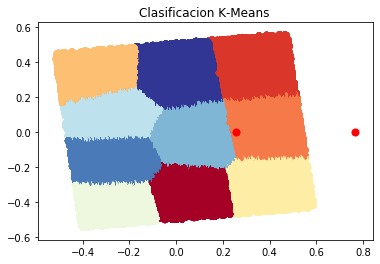

In [42]:
y_pred = clustering.predict(df_bd_Normalizada)


pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred,
           cmap='RdYlBu'); 
pl.scatter(centroides[:, 0], centroides[:, 1], c='red',s=50)
plt.title('Clasificacion K-Means ')
plt.show()

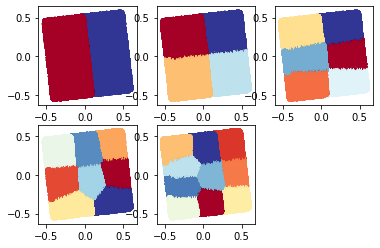

In [41]:
plt.subplot(2,3,1)
clustering = KMeans(n_clusters = 2, max_iter=300)
clustering.fit(df_bd_Normalizada)
y_pred = clustering.predict(df_bd_Normalizada)
pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred,
           cmap='RdYlBu'); 

plt.subplot(2,3,2)
clustering = KMeans(n_clusters = 4, max_iter=300)
clustering.fit(df_bd_Normalizada)
y_pred = clustering.predict(df_bd_Normalizada)

pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred,
           cmap='RdYlBu'); 

plt.subplot(2,3,3)
clustering = KMeans(n_clusters = 6, max_iter=300)
clustering.fit(df_bd_Normalizada)
y_pred = clustering.predict(df_bd_Normalizada)

pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred,
           cmap='RdYlBu'); 

plt.subplot(2,3,4)
clustering = KMeans(n_clusters = 8, max_iter=300)
clustering.fit(df_bd_Normalizada)
y_pred = clustering.predict(df_bd_Normalizada)

pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred,
           cmap='RdYlBu'); 

plt.subplot(2,3,5)
clustering = KMeans(n_clusters = 10, max_iter=300)
clustering.fit(df_bd_Normalizada)
y_pred = clustering.predict(df_bd_Normalizada)

pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred,
           cmap='RdYlBu'); 